In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### train csv 파일 읽어오기

In [42]:
train_df = pd.read_csv('/opt/ml/dataset/train/train.csv')
train_df.head(5)

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


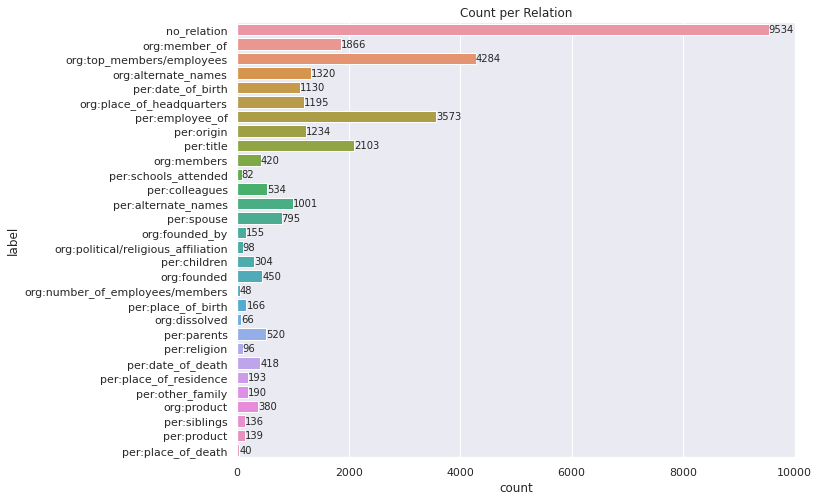

In [43]:
# Relation 순서는 무작위입니다.
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.countplot(y='label', data=train_df, ax=ax)
plt.title("Count per Relation")

for p in ax.patches:
        ax.annotate('{}'.format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+0.6), fontsize=10)

### sentence 길이 describe 및 시각화

In [46]:
train_df['sen_len'] = train_df['sentence'].map(lambda x: len(x))

In [47]:
train_df.head(5)

,id,sentence,subject_entity,object_entity,label,source,sen_len
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,59
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,54
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,99
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,78
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,56


In [48]:
s = train_df['sen_len']
s.describe()

count    32470.000000
mean        97.083954
std         47.939902
min         14.000000
25%         64.000000
50%         87.000000
75%        118.000000
max        455.000000
Name: sen_len, dtype: float64

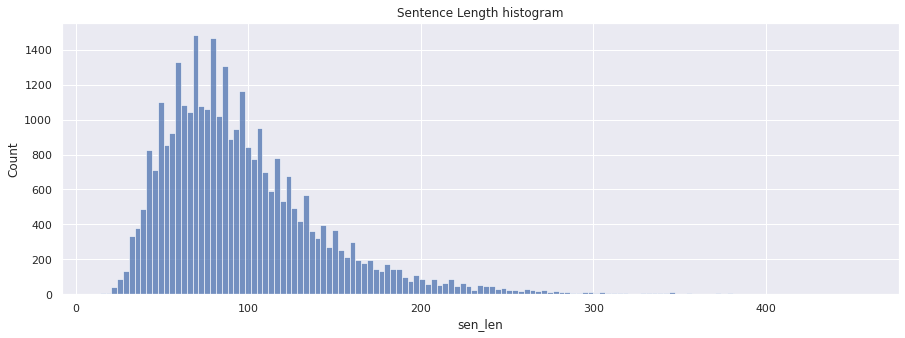

In [49]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))
sns.histplot(x='sen_len', data=train_df, ax=ax)
plt.title("Sentence Length histogram")
plt.show()

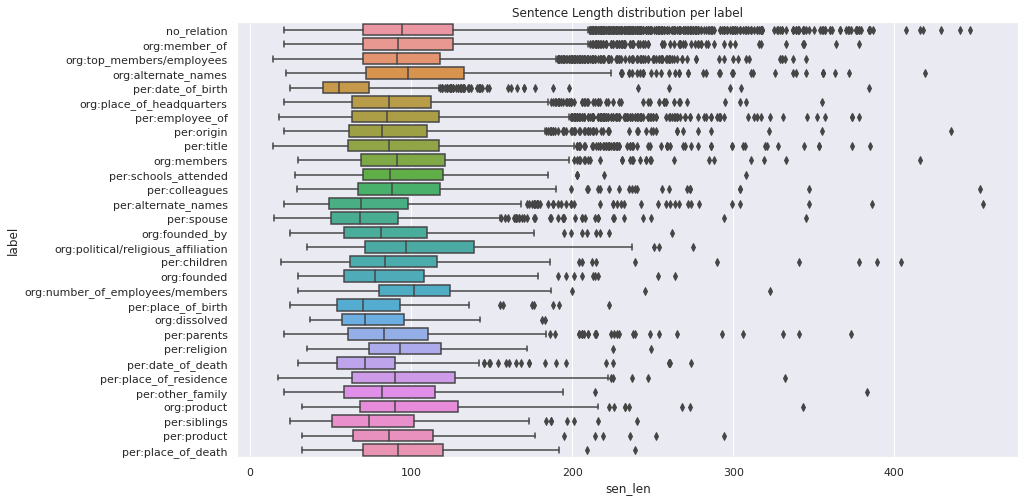

In [50]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(x='sen_len', y='label', data=train_df, ax=ax)
plt.title("Sentence Length distribution per label")
plt.show()

### label별 문장 최대, 최소, 평균 길이

- 아직 subplot에 text 표시 적용을 못했습니다.

In [54]:
label_max_len = []
label_min_len = []
label_named = list(train_df.label.unique())

# label별 최대 최소 찾기
label_df = pd.DataFrame(columns = ['label','max_len','min_len'])
for label in train_df.label.unique() :
    label_max_len.extend([max(train_df[train_df.label == label].sen_len)])
    label_min_len.extend([min(train_df[train_df.label == label].sen_len)])

label_df['label'] = label_named
label_df['max_len'] = label_max_len
label_df['min_len'] = label_min_len

In [55]:
label_df.head()

,label,max_len,min_len
0,no_relation,447,21
1,org:member_of,378,21
2,org:top_members/employees,345,14
3,org:alternate_names,419,22
4,per:date_of_birth,384,25


In [56]:
# 평균값 계산
gb = train_df.groupby(train_df['label'])['sen_len'].mean().reset_index()
gb['sen_len'] = gb['sen_len'].apply(lambda x : round(x,2))
gb.head()

,label,sen_len
0,no_relation,104.71
1,org:alternate_names,108.59
2,org:dissolved,80.15
3,org:founded,86.89
4,org:founded_by,90.66


In [57]:
# label 계수 계산
gb1 = train_df.groupby(train_df['label'])['id'].count().reset_index()
gb1.head()

,label,id
0,no_relation,9534
1,org:alternate_names,1320
2,org:dissolved,66
3,org:founded,450
4,org:founded_by,155


In [14]:
# 데이터 병합
merge_df = pd.merge(gb,label_df, how='inner',on='label')
merge_df = pd.merge(merge_df,gb1, how='inner',on='label')
merge_df.head()

,label,sen_len,max_len,min_len,id
0,no_relation,104.71,447,21,9534
1,org:alternate_names,108.59,419,22,1320
2,org:dissolved,80.15,183,37,66
3,org:founded,86.89,264,30,450
4,org:founded_by,90.66,262,25,155


In [15]:
print(merge_df.sen_len.max(),merge_df.sen_len.min())
print('-------mean_len-------')
print(merge_df[merge_df['sen_len']==merge_df.sen_len.min()])
print(merge_df[merge_df['sen_len']==merge_df.sen_len.max()])
print('---max_len---')
print(merge_df[merge_df['max_len']==merge_df.max_len.min()])
print(merge_df[merge_df['max_len']==merge_df.max_len.max()])
print('---min_len---')
print(merge_df[merge_df['min_len']==merge_df.min_len.min()])
print(merge_df[merge_df['min_len']==merge_df.min_len.max()])


109.65 63.4
-------mean_len-------
                label  sen_len  max_len  min_len    id
15  per:date_of_birth     63.4      384       25  1130
                             label  sen_len  max_len  min_len  id
7  org:number_of_employees/members   109.65      323       30  48
---max_len---
           label  sen_len  max_len  min_len  id
2  org:dissolved    80.15      183       37  66
                  label  sen_len  max_len  min_len    id
12  per:alternate_names    79.69      455       21  1001
---min_len---
                        label  sen_len  max_len  min_len    id
11  org:top_members/employees    98.62      345       14  4284
29                  per:title    94.87      385       14  2103
           label  sen_len  max_len  min_len  id
2  org:dissolved    80.15      183       37  66


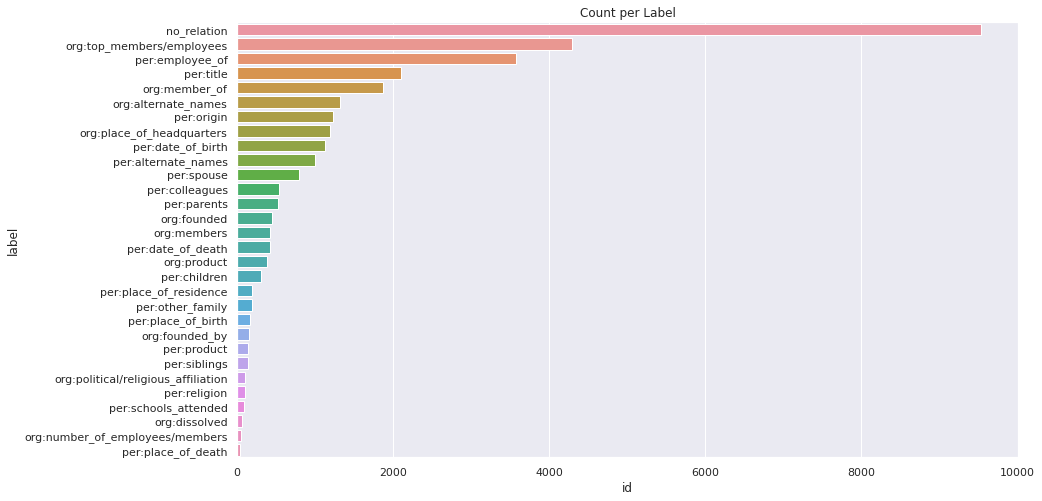

In [81]:
fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(x = 'id', y='label', data=merge_df.sort_values(by='id', ascending = False) ,ax = ax)
plt.title("Count per Label")
plt.show()


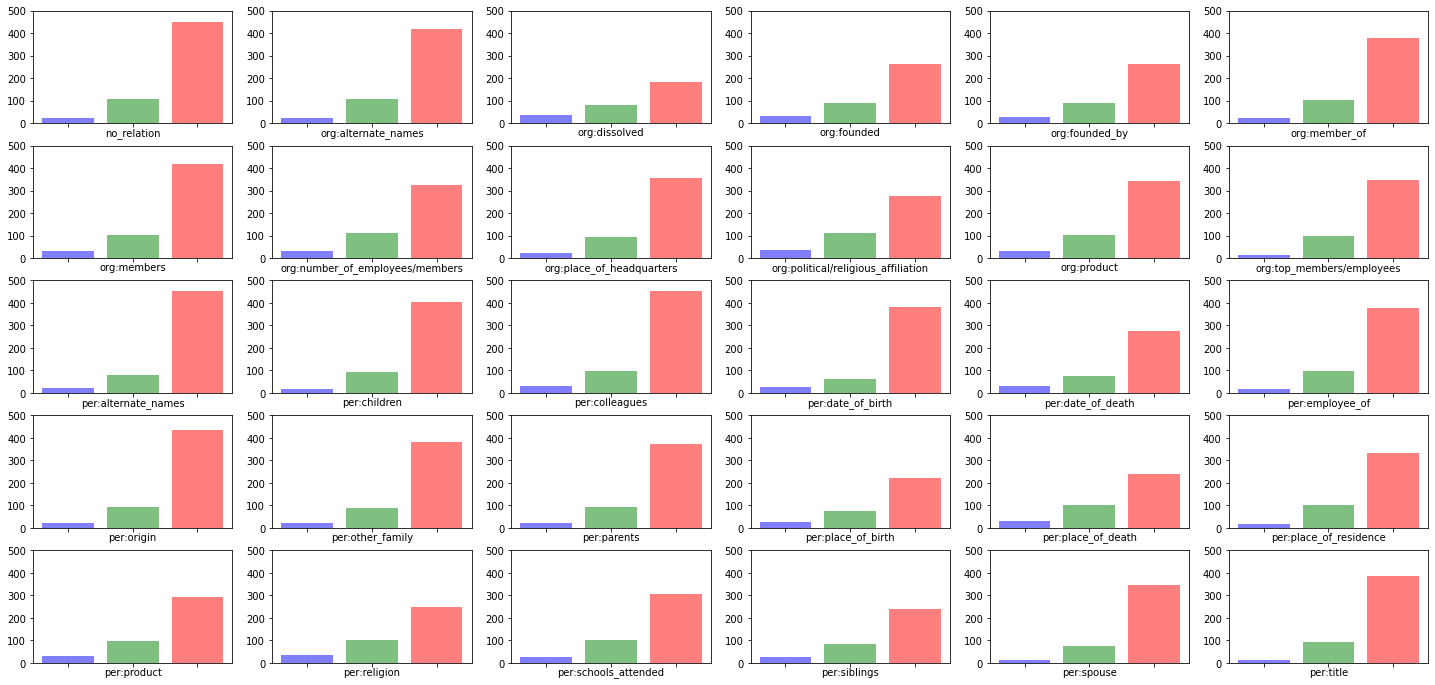

In [17]:
fig,axes = plt.subplots(5,6,figsize = (25,12))
idx = 0
for row in range(5) :
    for col in range(6) :
        axes[row,col].bar([merge_df['label'][idx]+' min',merge_df['label'][idx], merge_df['label'][idx]+' max'],[merge_df['min_len'][idx],merge_df['sen_len'][idx],merge_df['max_len'][idx]],color = ['b','g','r'], alpha = 0.5)
        axes[row,col].tick_params(axis = 'x',labelbottom=False)
        axes[row,col].set_xlabel(merge_df['label'][idx])
        axes[row,col].set_ylim(0,500)
        idx += 1

### Type Countplot

In [111]:
def make_type_countplot(df,df_name = 'train') :
    sub_arr = []
    obj_arr = []
    
    # type 추출 
    for x,y in zip(df['subject_entity'],df['object_entity']) :
        sub_arr.append(x[1:-1].split(':')[-1].split('\'')[-2])
        obj_arr.append(y[1:-1].split(':')[-1].split('\'')[-2])

    df_sub_obj_type = pd.DataFrame()
    df_sub_obj_type['sub_type'] = sub_arr
    df_sub_obj_type['obj_type'] = obj_arr

    fig,axes = plt.subplots(1,2,figsize = (16,8))
    sns.countplot(x='sub_type', data=df_sub_obj_type,order = df_sub_obj_type['sub_type'].value_counts().index,ax = axes[0])
    sns.countplot(x='obj_type', data=df_sub_obj_type,order = df_sub_obj_type['obj_type'].value_counts().index,ax = axes[1])
    axes[0].set_title(f'{df_name} sub type Countplot')
    axes[1].set_title(f'{df_name} obj type Countplot')
    plt.show()

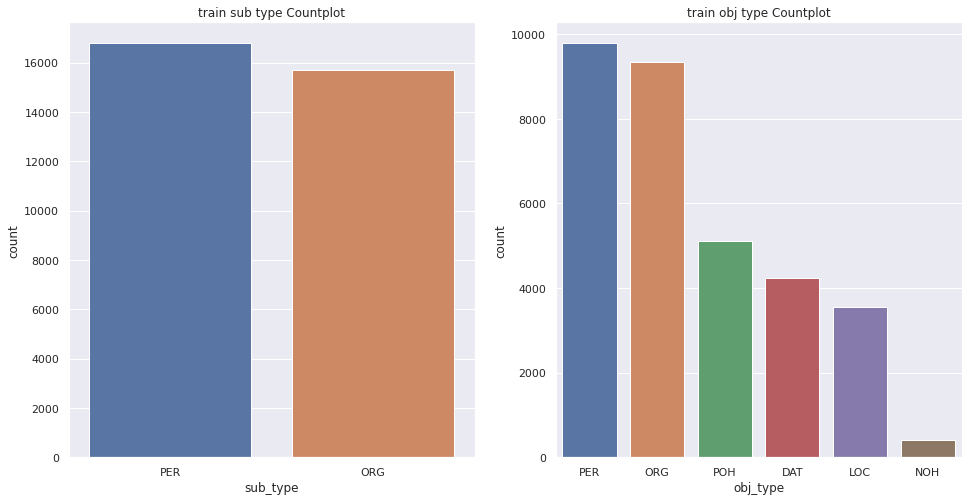

In [112]:
make_type_countplot(train_df,'train')

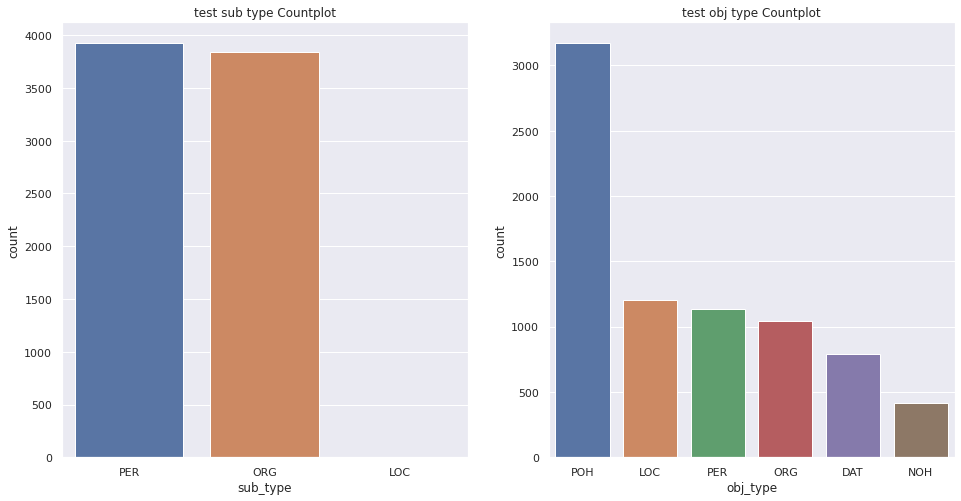

In [108]:
test_df = pd.read_csv('/opt/ml/dataset/test/test_data.csv')
make_type_countplot(test_df,'test')